In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math

In [37]:
def show_scatter_plot(title, 
                      x_label, y_label, 
                      x_values, y_values):

    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.show()

In [44]:
df = pd.read_csv("Salary_dataset.csv")
print(df.head(5))

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [45]:
'''
Calculate slope and intercept
'''
def calculate_slope_intercept(x_values, y_values):
   
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [46]:
'''
draw scatter plot
'''

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(df.YearsExperience, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

In [49]:
'''
Calculate ss residual and ss total 
'''
def calculate_ss(x_values, y_values):
    
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total

In [50]:
'''
calculate Coefficient of determination
'''
def calculate_r2(ss_residual, ss_total):
    cofd = 1 - ss_residual/ss_total
    return cofd

In [51]:
'''
Calculate Correlation
'''
def calculate_r(x_values, y_values):
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = numerator/denominator
    return r

Find a dataset which has two variables (you will call x and y, but they can have any names).
You should have a suspicion or intuition that variable y is linearly dependent on variable x in the dataset.
1. Create a scatter plot of the data



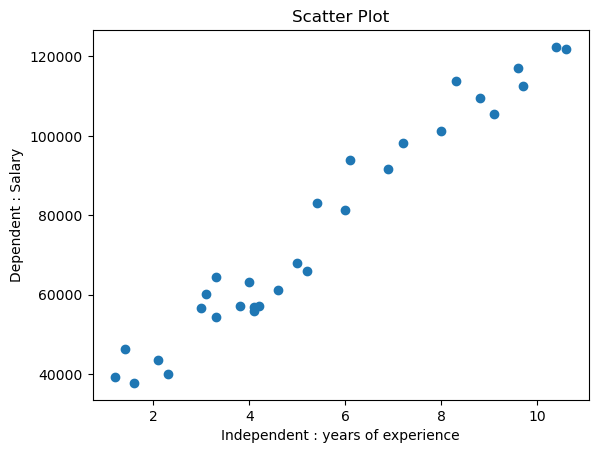

In [58]:
show_scatter_plot('Scatter Plot', 'Dependent : Salary', 
                  'Independent : years of experience', df.YearsExperience,df.Salary)

2. Draw the least-square regression line through the scatter plot 

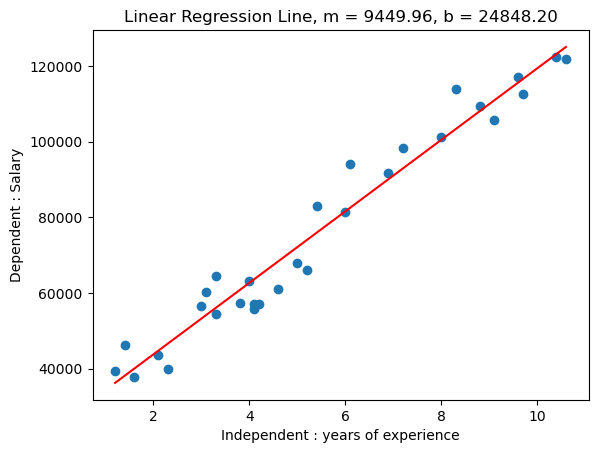

In [59]:
show_least_squares_line('Linear Regression Line', 'Dependent : Salary', 
                  'Independent : years of experience',df.YearsExperience,df.Salary)

3. Calculate and print the coefficient of determination and the correlation coefficient 

In [60]:
ss_residual, ss_total = calculate_ss(df.YearsExperience,df.Salary)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

ss_residual = 938128551.66833
ss_total    = 21794977852.00000
coefficient of determination = 0.957


In [61]:
r = calculate_r(df.YearsExperience,df.Salary)

print(f'Correlation  = {r:.3f}')

Correlation  = 0.978
